In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections 

%matplotlib inline

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [4]:
train.columns

Index(['Id', 'Title', 'Body', 'Tags'], dtype='object')

In [5]:
train.shape

(6034195, 4)

In [6]:
test.shape

(2013337, 3)

In [7]:
grouped_train=train.groupby(['Title','Body','Tags']).size().reset_index(name='Count')
grouped_train.Count.value_counts()

1    2656277
2    1272335
3     277575
4         90
5         25
6          5
Name: Count, dtype: int64

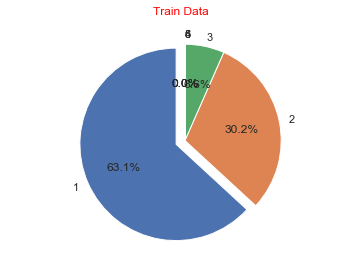

In [126]:
explode = (0.1, 0, 0, 0, 0, 0)
tgt1=grouped_train.Count.unique()
tgt2=grouped_train.Count.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(tgt2, explode=explode, labels=tgt1, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title('Train Data',pad=20)
ax1.title.set_color('red')
plt.savefig('duplicated_train.png', bbox_inches = "tight", dpi=125)

plt.show()


In [9]:
grouped_test=test.groupby(['Title','Body']).size().reset_index(name='Count')
grouped_test.Count.value_counts()

1    1562785
2     208857
3      10919
4         19
5          1
Name: Count, dtype: int64

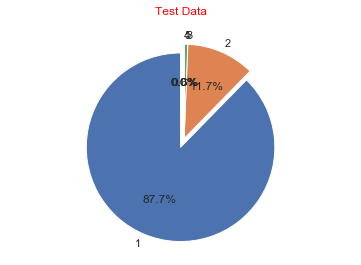

In [127]:
explode = (0.1, 0, 0, 0, 0)
tgt1=grouped_test.Count.unique()
tgt2=grouped_test.Count.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(tgt2, explode=explode, labels=tgt1, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title('Test Data',pad=20)
ax1.title.set_color('red')
plt.savefig('duplicated_test.png',  bbox_inches = "tight",dpi=125)
plt.show()


In [11]:
train.head(15)

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents
5,6,setting proxy in active directory environment,<p>I am using a machine on which active direct...,proxy active-directory jmeter
6,7,How to draw barplot in this way with Coreplot,<p>My image is cannot post so the link is my ...,core-plot
7,8,How to fetch an XML feed using asp.net,<p>I've decided to convert a Windows Phone 7 a...,c# asp.net windows-phone-7
8,9,.NET library for generating javascript?,<p>Do you know of a .NET library for generatin...,.net javascript code-generation
9,10,"SQL Server : procedure call, inline concatenat...",<p>I'm using SQL Server 2008 R2 and was wonder...,sql variables parameters procedure calls


In [12]:
test.head(15)

,Id,Title,Body
0,6034196,Getting rid of site-specific hotkeys,<p>How do I disable site-specific hotkeys if (...
1,6034197,Nodes inside Cisco VPN. Incoming SSH requests ...,<p>I've a gateway-to-gateway VPN setup between...
2,6034198,Remove old vCenter servers from VMWare vSphere...,<p>After changing our vCenter servers recently...
3,6034199,Replace <span> element with var containing html,"<p>I have a variable i lifted the contents of,..."
4,6034200,Will PHP included html content affect my seo?,<p>Today i purchase a small CMS system. With t...
5,6034201,Where is the acronym menu in Visual Studio 2010?,<p>With the following code Visual Studio + Res...
6,6034202,Iterating over the registers of a Yardoc `@macro`,<p>I am looking for way to iterate over the re...
7,6034203,URL Rewriting from Winforms or console applica...,<p>I'm importing classic ASP pages into a new ...
8,6034204,Create Non-Culture Based ResourceManager for A...,<p>I am working on an ASP.Net application that...
9,6034205,cocos2d: Handeling keyboard events on linux,<p>Im using cocos2d-x for developing a Linux a...


In [13]:
train.Tags.isna().sum()

8

In [14]:
unique_tags =set()
all_tags=[]

tags_df=train.Tags
for i in tags_df:
    if pd.notna(i):
        tmp_tag_ls=i.split(" ")
        for j in tmp_tag_ls:
            unique_tags.add(j)
            all_tags.append(j)


In [15]:
print("number of unique tags : ",len(unique_tags))

number of unique tags :  42048


In [16]:
print("number of all tags : ",len(all_tags))

number of all tags :  17409986


In [17]:
type(all_tags)

list

In [18]:
freq_tags=collections.Counter(all_tags)

In [19]:
top_tags={}
top_25_tags={}
cnt=0
for i in freq_tags.most_common():
    #print(i)
    top_tags[i[0]]=i[1]
    cnt=cnt+1
    if cnt<=25:
        top_25_tags[i[0]]=i[1]
    if cnt>99:
        break

In [20]:
top_25_tags

{'c#': 463526,
 'java': 412189,
 'php': 392451,
 'javascript': 365623,
 'android': 320622,
 'jquery': 305614,
 'c++': 199280,
 'python': 184928,
 'iphone': 183573,
 'asp.net': 177334,
 'mysql': 172182,
 'html': 165507,
 '.net': 162359,
 'ios': 136080,
 'objective-c': 133932,
 'sql': 132465,
 'css': 129107,
 'linux': 127606,
 'ruby-on-rails': 116883,
 'windows': 98100,
 'c': 95453,
 'sql-server': 74921,
 'ruby': 73502,
 'wpf': 65836,
 'xml': 64157}

In [21]:
top_tags

{'c#': 463526,
 'java': 412189,
 'php': 392451,
 'javascript': 365623,
 'android': 320622,
 'jquery': 305614,
 'c++': 199280,
 'python': 184928,
 'iphone': 183573,
 'asp.net': 177334,
 'mysql': 172182,
 'html': 165507,
 '.net': 162359,
 'ios': 136080,
 'objective-c': 133932,
 'sql': 132465,
 'css': 129107,
 'linux': 127606,
 'ruby-on-rails': 116883,
 'windows': 98100,
 'c': 95453,
 'sql-server': 74921,
 'ruby': 73502,
 'wpf': 65836,
 'xml': 64157,
 'ajax': 62239,
 'database': 59799,
 'regex': 59223,
 'windows-7': 58487,
 'asp.net-mvc': 57859,
 'xcode': 52513,
 'django': 52030,
 'osx': 51812,
 'arrays': 50055,
 'vb.net': 46653,
 'eclipse': 44092,
 'json': 43451,
 'facebook': 43393,
 'ruby-on-rails-3': 43166,
 'ubuntu': 43002,
 'performance': 39377,
 'networking': 38323,
 'string': 37802,
 'multithreading': 37619,
 'winforms': 37370,
 'security': 34499,
 'visual-studio-2010': 34433,
 'asp.net-mvc-3': 34422,
 'bash': 33116,
 'homework': 32535,
 'image': 32280,
 'wcf': 31490,
 'html5': 312

In [22]:
print("differecnt between most common tag and most common 100th tag : " ,top_tags['c#'] - top_tags['oop']," which is only " , top_tags['oop']*100/top_tags['c#'],"% of the count of most common tag")

differecnt between most common tag and most common 100th tag :  444510  which is only  4.102466744044563 % of the count of most common tag


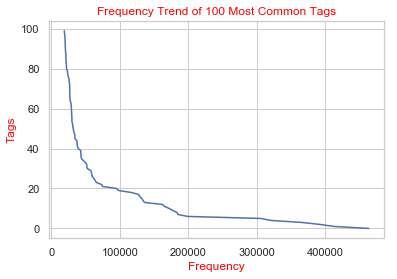

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(top_tags.values(),np.arange(100))
ax.set_ylabel("Tags")
ax.set_xlabel("Frequency")
ax.set_title("Frequency Trend of 100 Most Common Tags")
ax.xaxis.label.set_color("red")
ax.yaxis.label.set_color("red")
ax.title.set_color("red")
plt.savefig("top 100 plot",dpi=300,bbox_inches = "tight")

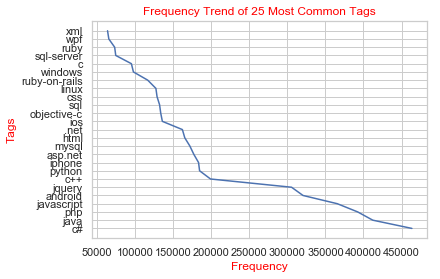

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(top_25_tags.values(),top_25_tags.keys())
ax.set_ylabel("Tags")
ax.set_xlabel("Frequency")
ax.set_title("Frequency Trend of 25 Most Common Tags")
ax.xaxis.label.set_color("red")
ax.yaxis.label.set_color("red")
ax.title.set_color("red")
plt.savefig("top 25 plot.png", bbox_inches = "tight",dpi=300)
plt.show()


In [103]:
tags_lt_5={}
for i in freq_tags.most_common():
    if i[1]<=25:
        tags_lt_5[i[0]]=i[1]

In [104]:
print("number of tags appear less than or equal to 25 times is : ",len(tags_lt_5))

number of tags appear less than or equal to 25 times is :  21600


In [114]:
tags_range=[0,0,0,0,0,0]
for i in freq_tags.most_common():
    if i[1] == 1:
        tags_range[0]=tags_range[0]+1
    elif i[1] <= 10:
        tags_range[1]=tags_range[1]+1
    elif i[1] <= 100:
        tags_range[2]=tags_range[3]+1
    elif i[1] <= 1000:
        tags_range[3]=tags_range[3]+1
    elif i[1] <= 10000:
        tags_range[4]=tags_range[4]+1
    elif i[1] > 10000:
        tags_range[5]=tags_range[5]+1

In [115]:
tags_range

[2663, 10994, 7991, 7990, 1914, 234]

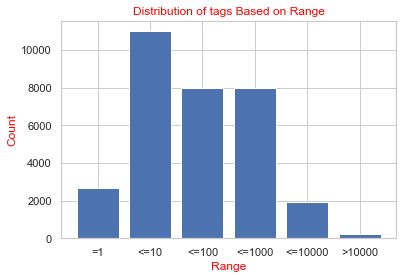

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(["=1","<=10","<=100","<=1000","<=10000",">10000"],tags_range)
ax.set_ylabel("Count")
ax.set_xlabel("Range")
ax.set_title("Distribution of tags Based on Range")
ax.xaxis.label.set_color("red")
ax.yaxis.label.set_color("red")
ax.title.set_color("red")
plt.savefig("tags count bar.png",dpi=300,bbox_inches = "tight")
plt.show()